In [90]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaned/generic_butcher_cleaned.csv')

In [3]:
df.head()


,product_name,date_time,measured_weight,measured_height
0,13 oz Ribeye Tail A,2024-06-03 07:16:28,16.76,1.62952
1,13 oz Ribeye Tail A,2024-06-03 07:16:47,16.12,1.02086
2,16 oz Ribeye Tail A,2024-06-03 07:17:36,16.34,1.03975
3,16 oz Ribeye Tail A,2024-06-03 07:17:53,16.16,1.05378
4,16 oz Ribeye Tail A,2024-06-03 07:18:08,16.12,1.03522


In [4]:
bot_bin = np.floor(df['measured_weight'][0])
top_bin = np.ceil(df['measured_weight'][0])

In [5]:
bins = np.arange(bot_bin, top_bin, .25)

In [6]:
len(bins)

4

In [7]:
for x in bins:
    print(x)

16.0
16.25
16.5
16.75


In [8]:
bins = list(map(lambda x: float(x), bins))

In [9]:
bins

[16.0, 16.25, 16.5, 16.75]

In [10]:
# df['binned_values'] = pd.cut(df['measured_weight'], bins=bins, labels=False)

In [19]:
unique_prods = list(df.groupby('product_name')[['measured_weight']].value_counts().reset_index()['product_name'].unique())

In [20]:
unique_prods

['10 oz  Sirloin A',
 '11 oz  Sirloin B',
 '11 oz  Sirloin C',
 '13 oz  Ribeye Tail A',
 '16 oz  Dry Age Ribeye A',
 '16 oz  Prime Strip A',
 '16 oz  Ribeye Tail A',
 '16 oz  Strip A',
 '18 oz  Ribeye A',
 '20 oz  Prime Ribeye A',
 '22 oz  Porterhouse A',
 '3.5 oz Tender Bits A',
 '4 oz T Tenderloin Tail A',
 '5 oz S Sirloin A',
 '5 oz S Sirloin B',
 '6 oz S Sirloin A',
 '6 oz S Sirloin B',
 '6 oz T Tenderloin A',
 '7 oz S Sirloin A',
 '7 oz S Sirloin B',
 '7 oz T Tenderloin A',
 '8 oz P Pork Chop A',
 '8 oz S Sirloin A',
 '8 oz S Sirloin B',
 '8 oz T Tenderloin A',
 '9 oz S Sirloin A',
 '9 oz T Tenderloin A']

In [21]:
df.groupby('product_name')[['measured_weight']].value_counts().reset_index()

,product_name,measured_weight,count
0,10 oz Sirloin A,10.00,41
1,10 oz Sirloin A,9.64,31
2,10 oz Sirloin A,9.84,28
3,10 oz Sirloin A,9.54,28
4,10 oz Sirloin A,10.10,24
...,...,...,...
2603,9 oz T Tenderloin A,9.11,1
2604,9 oz T Tenderloin A,9.21,1
2605,9 oz T Tenderloin A,8.22,1
2606,9 oz T Tenderloin A,8.20,1


In [22]:
prod_df = df.loc[df['product_name'] == unique_prods[0]]

In [60]:
bot_bin = np.floor(prod_df['measured_weight'].min())
top_bin = np.ceil(prod_df['measured_weight'].max())

In [61]:
bot_bin

9.0

In [62]:
top_bin 

11.0

In [72]:
bins = np.arange(bot_bin, top_bin + .25, .25)

In [73]:
bins = list(map(lambda x: float(x), bins))

In [74]:
bins

[9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0]

In [75]:
prod_df.loc[:, 'bins'] = pd.cut(prod_df['measured_weight'], bins=bins, labels=False)

In [86]:
bin_counts = prod_df['bins'].value_counts().sort_index().values

In [87]:
bin_counts

array([ 22,  76, 213, 271, 109,   1,   1,   2], dtype=int64)

In [78]:
bins

[9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0]

In [70]:
unique_prods[0]

'10 oz  Sirloin A'

In [88]:
x_bins = bins[:-1]
x_bins

[9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75]

c:\Users\saad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

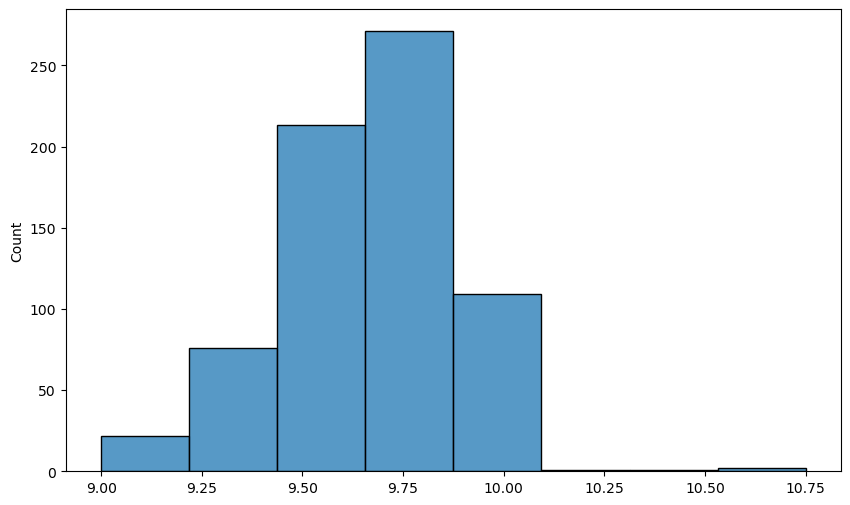

In [91]:
plt.figure(figsize=(10,6))
seaborn.histplot(x=x_bins, weights=bin_counts, bins=len(x_bins))
